<a href="https://colab.research.google.com/github/peter-callahan/Is-Pete-A-Good-Pilot/blob/main/Flight%20Data%20-%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import HTML

pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

### Import processed flight data from previous analysis 

In [ ]:
flight_data_input = pd.read_csv('output_flight_data_hv_wx.csv', parse_dates=['Time', 'Date'])

Datetime Conversions for Processing

In [ ]:
flight_data_input['Time'] = flight_data_input['Time'].map(datetime.datetime.toordinal)
flight_data_input['Date'] = flight_data_input['Date'].map(datetime.datetime.toordinal)

Categorical variables must be converted to dummy variables before they can be processed via PCA.  

In [ ]:
flight_data_input.head()

,No,Latitude,Longitude,Temperature,Speed,Course,Time,Altitude_Feet_MSL,Groundspeed,elev_ft,Altitude_Feet_AGL,msn_nbr,Altitude_Error,Altitude_Feet_AGL_Corr,AGL_Final,airborne,DIR,SPD,CLG,SKC,VSB,TEMP,DEWP,SLP,ALT,Date,Headwind_Tailwind,Airspeed,hv_violation,Threat_Percentage
0,414,31.857462,64.229172,25.0,0.67,166.4,737923,3500,1,2900.0,600.0,1,568.0,32.0,32.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.67,0,19.094978
1,415,31.857451,64.229171,25.0,1.28,182.5,737923,3501,1,2900.0,601.0,1,568.0,33.0,33.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,1.28,0,19.094978
2,416,31.857443,64.229173,25.0,0.85,168.7,737923,3501,1,2900.0,601.0,1,568.0,33.0,33.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.85,0,19.094978
3,417,31.857437,64.229171,25.0,0.70,191.8,737923,3502,1,2900.0,602.0,1,568.0,34.0,34.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.70,0,19.094978
4,418,31.857426,64.229170,25.0,1.25,185.1,737923,3502,1,2900.0,602.0,1,568.0,34.0,34.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,1.25,0,19.094978


In [ ]:
# Create a list of matrix of values, list of list of dummy variables
flight_data_dummies = [pd.get_dummies(flight_data_input['SKC'], prefix= 'SKC', prefix_sep=':'),
                       pd.get_dummies(flight_data_input['msn_nbr'], prefix= 'msn_nbr', prefix_sep=':')]

# concatenate into DF
flight_data_dummies_full = pd.concat(flight_data_dummies, axis = 1)

In [ ]:
flight_data_dummies_full.head()

,SKC:***,SKC:CLR,SKC:OBS,SKC:SCT,msn_nbr:1,msn_nbr:2,msn_nbr:3,msn_nbr:4,msn_nbr:5,msn_nbr:6,msn_nbr:7,msn_nbr:8,msn_nbr:9,msn_nbr:10,msn_nbr:11,msn_nbr:12,msn_nbr:13,msn_nbr:14,msn_nbr:15,msn_nbr:17
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
flight_data_processed = pd.concat([flight_data_input, flight_data_dummies_full], axis = 1)

In [ ]:
flight_data_processed.head()

,No,Latitude,Longitude,Temperature,Speed,Course,Time,Altitude_Feet_MSL,Groundspeed,elev_ft,Altitude_Feet_AGL,msn_nbr,Altitude_Error,Altitude_Feet_AGL_Corr,AGL_Final,airborne,DIR,SPD,CLG,SKC,VSB,TEMP,DEWP,SLP,ALT,Date,Headwind_Tailwind,Airspeed,hv_violation,Threat_Percentage,SKC:***,SKC:CLR,SKC:OBS,SKC:SCT,msn_nbr:1,msn_nbr:2,msn_nbr:3,msn_nbr:4,msn_nbr:5,msn_nbr:6,msn_nbr:7,msn_nbr:8,msn_nbr:9,msn_nbr:10,msn_nbr:11,msn_nbr:12,msn_nbr:13,msn_nbr:14,msn_nbr:15,msn_nbr:17
0,414,31.857462,64.229172,25.0,0.67,166.4,737923,3500,1,2900.0,600.0,1,568.0,32.0,32.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.67,0,19.094978,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,415,31.857451,64.229171,25.0,1.28,182.5,737923,3501,1,2900.0,601.0,1,568.0,33.0,33.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,1.28,0,19.094978,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,416,31.857443,64.229173,25.0,0.85,168.7,737923,3501,1,2900.0,601.0,1,568.0,33.0,33.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.85,0,19.094978,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,417,31.857437,64.229171,25.0,0.70,191.8,737923,3502,1,2900.0,602.0,1,568.0,34.0,34.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.70,0,19.094978,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,418,31.857426,64.229170,25.0,1.25,185.1,737923,3502,1,2900.0,602.0,1,568.0,34.0,34.0,0,360,5.0,722,SCT,6.2,35.0,32.0,1017.0,29.97,735277,0.0,1.25,0,19.094978,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


It is necessary to remove the reference categories in the PCA - these are the values that represent a "base case" against wich other values can be compared.  After creating dummy variables we need to drop the original categories (non-dummy variables) and the base case values.  Removing the "Threat_Percentage" is also necessary as this is an aggregated value from a previous phase of the analysis.

In [ ]:
reference_categories = ['SKC:CLR', 'msn_nbr:1']

remove_before_analysis = reference_categories + ['SKC', 'msn_nbr', 'Threat_Percentage']

In [ ]:
flight_data_processed = flight_data_processed.drop(remove_before_analysis, axis=1)

In [ ]:
flight_data_processed.head()

,No,Latitude,Longitude,Temperature,Speed,Course,Time,Altitude_Feet_MSL,Groundspeed,elev_ft,Altitude_Feet_AGL,Altitude_Error,Altitude_Feet_AGL_Corr,AGL_Final,airborne,DIR,SPD,CLG,VSB,TEMP,DEWP,SLP,ALT,Date,Headwind_Tailwind,Airspeed,hv_violation,SKC:***,SKC:OBS,SKC:SCT,msn_nbr:2,msn_nbr:3,msn_nbr:4,msn_nbr:5,msn_nbr:6,msn_nbr:7,msn_nbr:8,msn_nbr:9,msn_nbr:10,msn_nbr:11,msn_nbr:12,msn_nbr:13,msn_nbr:14,msn_nbr:15,msn_nbr:17
0,414,31.857462,64.229172,25.0,0.67,166.4,737923,3500,1,2900.0,600.0,568.0,32.0,32.0,0,360,5.0,722,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.67,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,415,31.857451,64.229171,25.0,1.28,182.5,737923,3501,1,2900.0,601.0,568.0,33.0,33.0,0,360,5.0,722,6.2,35.0,32.0,1017.0,29.97,735277,0.0,1.28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,416,31.857443,64.229173,25.0,0.85,168.7,737923,3501,1,2900.0,601.0,568.0,33.0,33.0,0,360,5.0,722,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.85,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,417,31.857437,64.229171,25.0,0.70,191.8,737923,3502,1,2900.0,602.0,568.0,34.0,34.0,0,360,5.0,722,6.2,35.0,32.0,1017.0,29.97,735277,0.0,0.70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,418,31.857426,64.229170,25.0,1.25,185.1,737923,3502,1,2900.0,602.0,568.0,34.0,34.0,0,360,5.0,722,6.2,35.0,32.0,1017.0,29.97,735277,0.0,1.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(flight_data_processed)

In [ ]:
print(scaled_data)

[[-1.69974111  0.22177353 -0.33813497 ... -0.17374041 -0.27431861
  -0.27999335]
 [-1.69971275  0.22174665 -0.33813732 ... -0.17374041 -0.27431861
  -0.27999335]
 [-1.6996844   0.2217271  -0.33813263 ... -0.17374041 -0.27431861
  -0.27999335]
 ...
 [ 1.97204211  0.22235263 -0.34031306 ... -0.17374041 -0.27431861
   3.57151333]
 [ 1.97207047  0.22235507 -0.34031306 ... -0.17374041 -0.27431861
   3.57151333]
 [ 1.97209882  0.22235752 -0.3403154  ... -0.17374041 -0.27431861
   3.57151333]]


### PCA

After experimentation, the number of meaningful components turned out to be 2.  When adding PCA components beyond 2 the variables grouped into each individual PCA became less distinct/intelligible.

Text(0, 0.5, 'Second Principal Component')

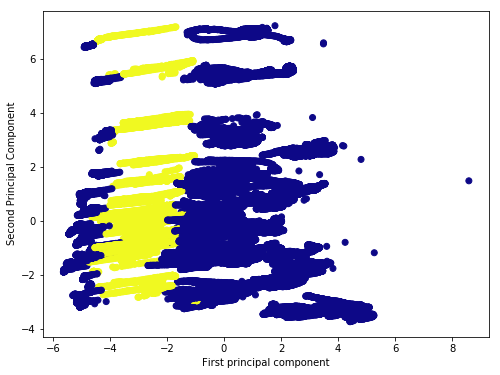

In [ ]:
pca = PCA(n_components=2)

pca.fit(scaled_data)

x_pca_flight_data = pca.transform(scaled_data)

plt.figure(figsize=(8,6))

plt.scatter(x_pca_flight_data[:,0],
            x_pca_flight_data[:,1],
            c=flight_data_input['hv_violation'],
            cmap='plasma')

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Plotting the outcome of the PCA and adding highlights to the violation data reveals the outline of a relationship.  We cannot be sure what this means yet, but can say that the distribution of violation data (as indicated by the highlighted points) appears non-random.  

In [ ]:
df_comp = pd.DataFrame(pca.components_, 
                       columns=flight_data_processed.columns)

### Mapping PCA Variables

#### PCA 0 - Flight Variables

Plotting the PCA values and sorting by covariance allows us to see batches of "similar" variables along the X-axis. 

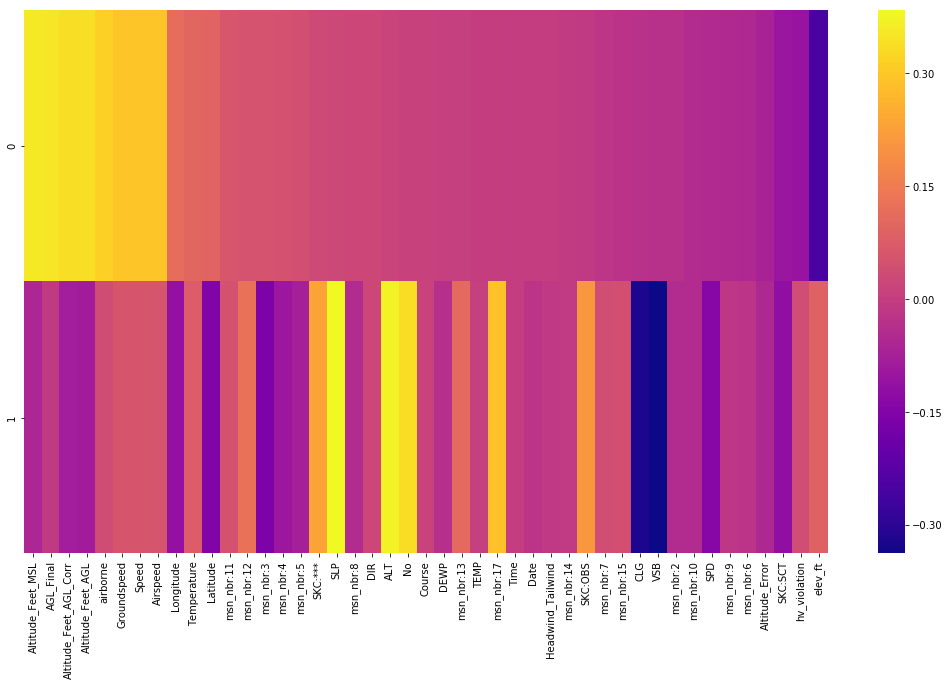

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df_comp.sort_values(by=0, ascending=False, axis=1),
            cmap='plasma',)

Note the correlation of values in PCA 0 (top left of the heatmap). These are values like altitude and airspeed, which define the envelope of "bad flying” in the first place. Thus, it is expected to see these variables are the most predictive since they are part of the definition of "bad flying" in the first place.  

This confirms a trend we would expect to see and is interesting, building confidence in the analysis, but is not informative.

Note that a positive correlation (higher airspeed, higher altitude) is correlated with fewer episodes of “bad flying.” Taking another look at the height-velocity diagram helps to illustrate this point.  Above certain levels of airspeed and altitude we no longer experience the risk of a  violation of the height velocity diagram.

In [ ]:
display(HTML("<table><tr><td><img src='https://callpete-public.s3.amazonaws.com/flight_project/images/Height-Velocity+Diagram.png' width='80%'></td><td><img src='https://callpete-public.s3.amazonaws.com/flight_project/images/hv_diagram_datapoints.png'></td></tr></table>"))

,


#### PCA 1 - Environmental Variables

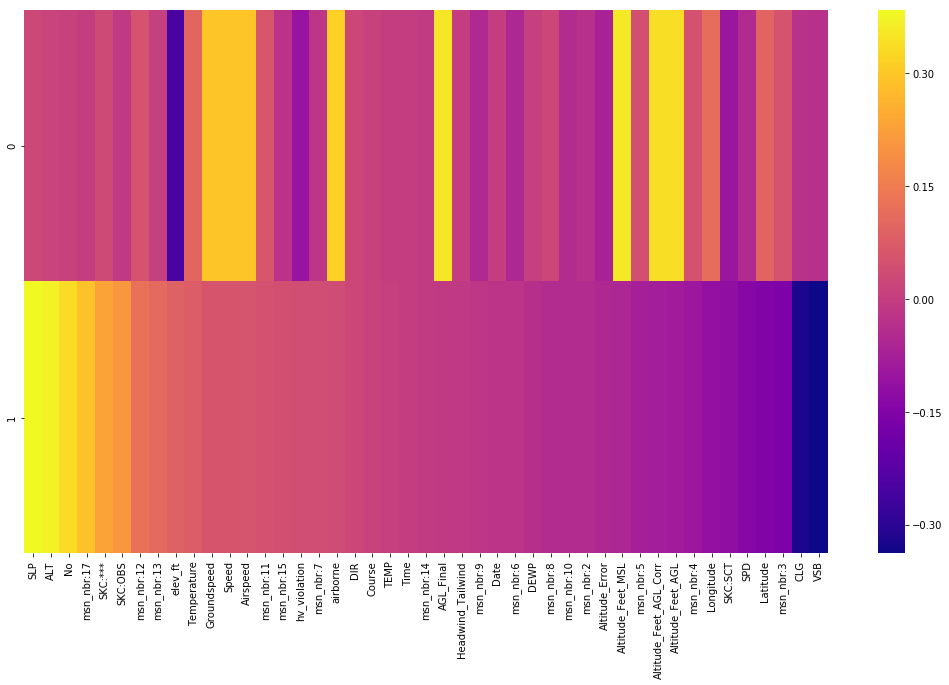

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df_comp.sort_values(by=1, ascending=False, axis=1),
            cmap='plasma',)

**First** - SLP (Sea Level Pressure), ALT (altimeter setting) and SKC (sky condition) are all environmental variables that appear to be positively correlated with hv_violations.  This can be interpreted as the higher sea level and atmospheric pressure (which are also correlated with eachother) tend to be present alongside "bad flying". 

**Second** - CLG (cloud ceiling) and VSB (inflight visibility) tend to be negatively correlated with "bad flying.”  This does not mean these values are absent, as inflight visibility must be some value, but rather that they are lower.  Lower ceilings and worse visibility are correlated with "bad flying.”  

**Third** - Individual flight missions are identified based on the mission number from the previous analysis.  Some missions were flown on the same day, others on different days.  We have no extra data regarding the purpose of each mission (some are more important than others) and cannot infer much about the impact of such a relationship.  We do know that missions taking place on different days might involve different weather conditions, and weather is the value we know matters.  Thus it is probable that certain missions occurred under worse weather conditions (mission 17, 12, 13) which contributed in part to a greater number of hv_violations and more “bad flying.” 

In [ ]:
df_comp.to_csv('PCA_output.csv', index=True)

###  Conclusion 

The PCA analysis reveals the presence of an interesting insight, that bad weather (low visibility, high wind, low clouds) creates an environment where more mistakes occur, mistakes in this case calculated by the quantity of height-velocity violations.  This is a relationship that most pilots would likely agree exists based on experience, but the patterns in the data and measurability of the effect, implies a connection.